<a href="https://colab.research.google.com/github/le-patrice/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/mnist_pyimageipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing feedfoward neural networks with keras and Tensorflow

### Step 0: Import the libraries and load the data

In [13]:
from sklearn.preprocessing import LabelBinarizer # This will be used for one_hot encoding tranforming categorical labels from single integer to a vector
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential # This indicates that our model will be a feed foward and layers will be added to the class sequentially
from tensorflow.keras.layers import Dense # This class is the implementation of our fully connected layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import argparse
plt.style.use('ggplot')
%matplotlib inline

#Warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset
- grab the MNISt dataset
- each image in the MNIST dataset is represented as a 28*28*1 image, but in order to apply a standard neural network we must first flatten the image to be simple list of 28*28=784 pixels


In [14]:
print("[INFO] accessing MNSIT")
((trainX, trainY),(testX,testY)) = mnist.load_data()

[INFO] accessing MNSIT


In [15]:
# Flattening the image to be simple list of 28*28 and scaling
trainX = trainX.reshape((trainX.shape[0], 28*28*1)).astype('float32')/255.0
testX = testX.reshape((testX.shape[0], 28*28*1)).astype('float32')/255.0


#### Step 1: Feature engineering the data

In [16]:
# Convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

#### Step2: Model design

In [19]:
# Network architecutre
 #define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [10]:
# Train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1385 - loss: 2.3155 - val_accuracy: 0.2155 - val_loss: 2.2321
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3685 - loss: 2.2158 - val_accuracy: 0.5304 - val_loss: 2.1474
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5103 - loss: 2.1247 - val_accuracy: 0.5935 - val_loss: 2.0254
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5865 - loss: 1.9943 - val_accuracy: 0.5848 - val_loss: 1.8522
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6127 - loss: 1.8091 - val_accuracy: 0.6398 - val_loss: 1.6312
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6543 - loss: 1.5878 - val_accuracy: 0.7039 - val_loss: 1.4034
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6984 - loss: 1.3677 - val_accuracy: 0.7419 - val_loss: 1.2094
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.729

#### Step 3: Model Evaluation

In [20]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),\
                            target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.18       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



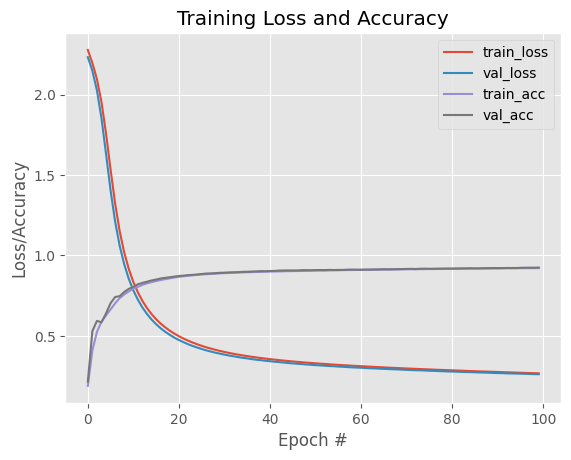

In [21]:
# Plot the training loss and accuracy
plt.figure()
plt.plot(np.arange(0,100),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,100),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,100),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,100),H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()